In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [172]:
df = pd.read_csv('vgchartz-2024.csv')

In [173]:
df.shape

(64016, 14)

In [174]:
df.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [175]:
df = df.drop('img', axis = 1)

In [176]:
df.columns

Index(['title', 'console', 'genre', 'publisher', 'developer', 'critic_score',
       'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales',
       'release_date', 'last_update'],
      dtype='object')

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         64016 non-null  object 
 1   console       64016 non-null  object 
 2   genre         64016 non-null  object 
 3   publisher     64016 non-null  object 
 4   developer     63999 non-null  object 
 5   critic_score  6678 non-null   float64
 6   total_sales   18922 non-null  float64
 7   na_sales      12637 non-null  float64
 8   jp_sales      6726 non-null   float64
 9   pal_sales     12824 non-null  float64
 10  other_sales   15128 non-null  float64
 11  release_date  56965 non-null  object 
 12  last_update   17879 non-null  object 
dtypes: float64(6), object(7)
memory usage: 6.3+ MB


In [178]:
df.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,6678.000000,18922.000000,12637.000000,6726.000000,12824.000000,15128.000000
mean,7.220440,0.349113,0.264740,0.102281,0.149472,0.043041
std,1.457066,0.807462,0.494787,0.168811,0.392653,0.126643
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,0.030000,0.050000,0.020000,0.010000,0.000000
50%,7.500000,0.120000,0.120000,0.040000,0.040000,0.010000
75%,8.300000,0.340000,0.280000,0.120000,0.140000,0.030000
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000


In [179]:
df.nunique()

title           39798
console            81
genre              20
publisher        3383
developer        8862
critic_score       89
total_sales       482
na_sales          320
jp_sales          121
pal_sales         256
other_sales       133
release_date     7922
last_update      1545
dtype: int64

In [180]:
result = df[df['title'] == 'Grand Theft Auto']
result

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
407,Grand Theft Auto,PS,Action,Take-Two Interactive,DMA Design,6.0,2.32,0.79,0.04,1.35,0.14,1998-06-30,NaN
6243,Grand Theft Auto,GBA,Action,Rockstar Games,Digital Eclipse,7.1,0.24,0.17,NaN,0.06,0.00,2004-10-26,NaN
18627,Grand Theft Auto,PC,Action,ASC Games,DMA Design,6.4,0.00,NaN,NaN,0.00,0.00,1998-03-24,NaN
20876,Grand Theft Auto,GB,Action,Rockstar Games,Tarantula Studios,NaN,NaN,NaN,NaN,NaN,NaN,1999-01-01,NaN
29007,Grand Theft Auto,Series,Action-Adventure,Rockstar Games,Rockstar North,NaN,NaN,NaN,NaN,NaN,NaN,1998-03-27,2020-02-03
29179,Grand Theft Auto,All,Action-Adventure,ASC Games,DMA Design,NaN,NaN,NaN,NaN,NaN,NaN,1998-03-24,2022-09-28


In [181]:
df = df.drop_duplicates(subset=['title', 'console'])

df = df.groupby(['title', 'console', 'genre', 'publisher', 'developer', 'release_date']).agg({
    'critic_score': 'mean',
    'total_sales': 'sum',
    'na_sales': 'sum',
    'jp_sales': 'sum',
    'pal_sales': 'sum',
    'other_sales': 'sum'
}).reset_index()


result = df[df['title'] == 'Grand Theft Auto V']
result

,title,console,genre,publisher,developer,release_date,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
19552,Grand Theft Auto V,All,Action-Adventure,Rockstar Games,Rockstar North,2013-09-17,NaN,0.00,0.00,0.00,0.00,0.00
19553,Grand Theft Auto V,PC,Action,Rockstar Games,Rockstar North,2015-04-14,NaN,0.00,0.00,0.00,0.00,0.00
19554,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,2013-09-17,9.4,20.32,6.37,0.99,9.85,3.12
19555,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,2014-11-18,9.7,19.39,6.06,0.60,9.71,3.02
19556,Grand Theft Auto V,PS5,Action-Adventure,Rockstar Games,Rockstar Games,2021-12-01,NaN,0.00,0.00,0.00,0.00,0.00
19557,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,2013-09-17,NaN,15.86,9.06,0.06,5.33,1.42
19558,Grand Theft Auto V,XOne,Action,Rockstar Games,Rockstar North,2014-11-18,9.0,8.72,4.70,0.01,3.25,0.76
19559,Grand Theft Auto V,XS,Action-Adventure,Rockstar Games,Rockstar Games,2021-12-01,NaN,0.00,0.00,0.00,0.00,0.00


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56759 entries, 0 to 56758
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         56759 non-null  object 
 1   console       56759 non-null  object 
 2   genre         56759 non-null  object 
 3   publisher     56759 non-null  object 
 4   developer     56759 non-null  object 
 5   release_date  56759 non-null  object 
 6   critic_score  6604 non-null   float64
 7   total_sales   56759 non-null  float64
 8   na_sales      56759 non-null  float64
 9   jp_sales      56759 non-null  float64
 10  pal_sales     56759 non-null  float64
 11  other_sales   56759 non-null  float64
dtypes: float64(6), object(6)
memory usage: 5.2+ MB


In [183]:
df.isnull().sum()

title               0
console             0
genre               0
publisher           0
developer           0
release_date        0
critic_score    50155
total_sales         0
na_sales            0
jp_sales            0
pal_sales           0
other_sales         0
dtype: int64

In [184]:
from sklearn.impute import SimpleImputer

median_imputer = SimpleImputer(strategy='median')
df[['critic_score']] = median_imputer.fit_transform(df[['critic_score']])

df.isnull().sum()

title           0
console         0
genre           0
publisher       0
developer       0
release_date    0
critic_score    0
total_sales     0
na_sales        0
jp_sales        0
pal_sales       0
other_sales     0
dtype: int64

In [185]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

Object type columns:
Index(['title', 'console', 'genre', 'publisher', 'developer', 'release_date'], dtype='object')


In [186]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical type columns:")
print(numerical_columns)

Numerical type columns:
Index(['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales',
       'other_sales'],
      dtype='object')


In [187]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []
    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 20:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)
    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [188]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [189]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: []
Non-Categorical Features: ['title', 'console', 'genre', 'publisher', 'developer', 'release_date']
Discrete Features: []
Continuous Features: ['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']


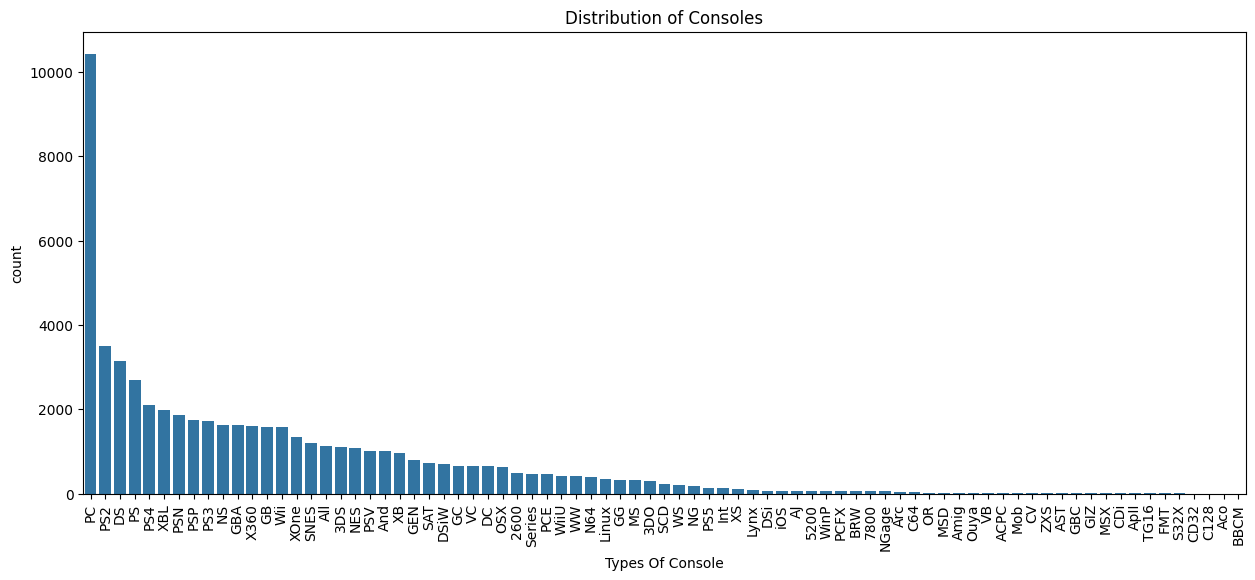

In [216]:
console = df['console'].value_counts()

plt.figure(figsize=(15,6))

sns.barplot(x = console.index,y=console.values)
plt.title('Distribution of Consoles')
plt.xlabel('Types Of Console')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

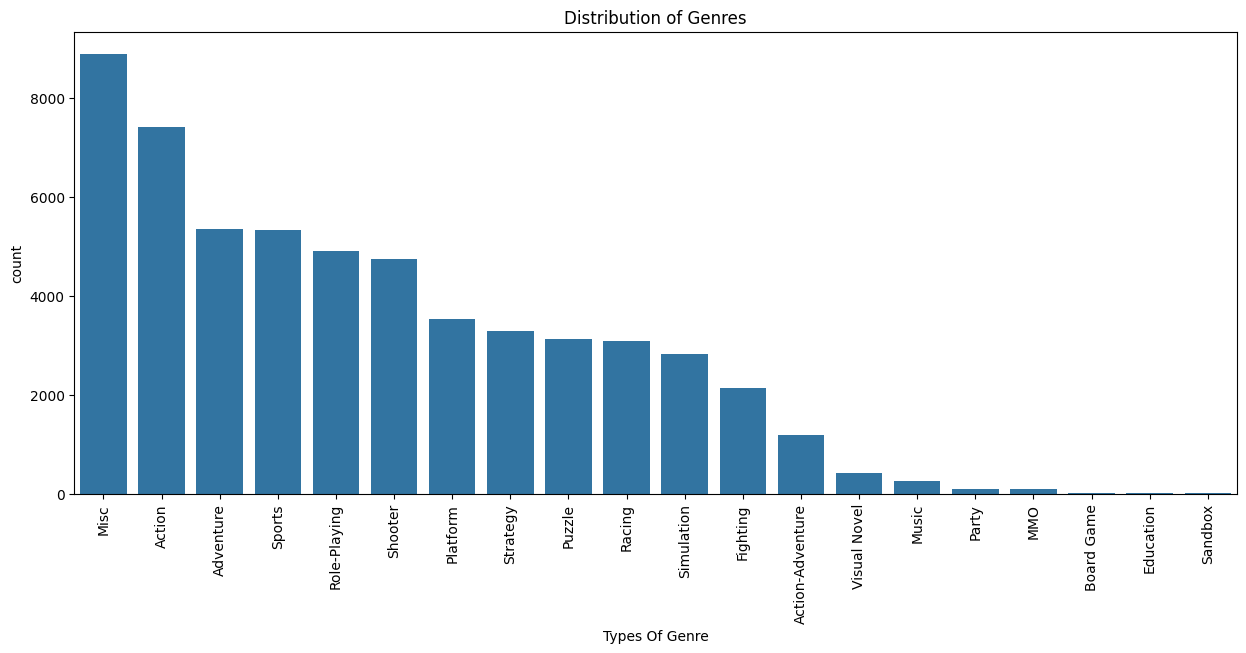

In [217]:
console = df['genre'].value_counts()

plt.figure(figsize=(15,6))

sns.barplot(x = console.index,y=console.values)
plt.title('Distribution of Genres')
plt.xlabel('Types Of Genre')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

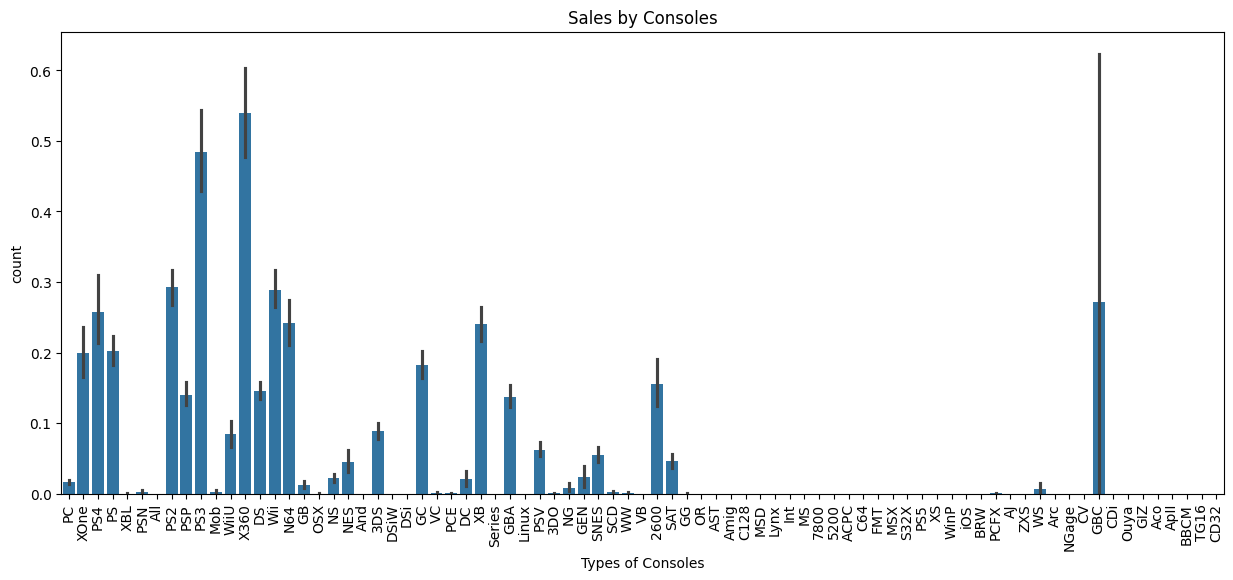

In [214]:
plt.figure(figsize=(15,6))
sns.barplot(x = df['console'],y=df['total_sales'])
plt.title('Sales by Consoles')
plt.xlabel('Types of Consoles')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

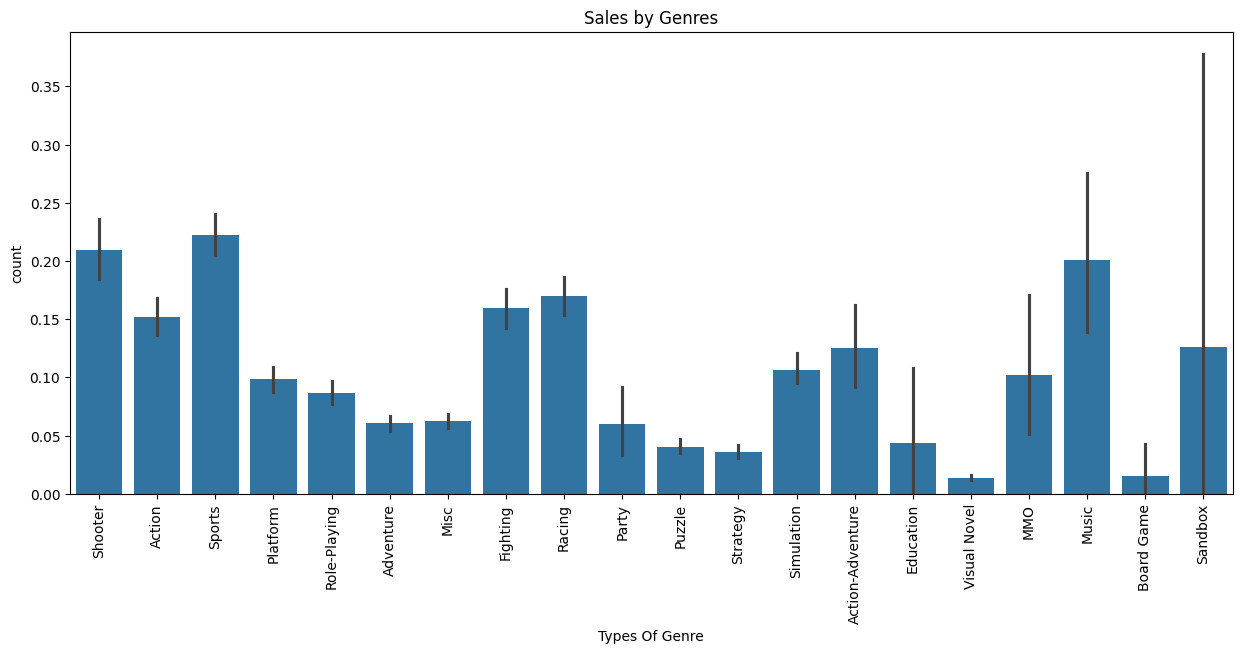

In [218]:
plt.figure(figsize=(15,6))
sns.barplot(x = df['genre'],y=df['total_sales'])
plt.title('Sales by Genres')
plt.xlabel('Types Of Genre')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

In [220]:
platforms = df.groupby(['title', 'console'])['total_sales'].sum().sort_values(ascending=False).head(10)
platforms

title                           console
Grand Theft Auto V              PS3        20.32
                                PS4        19.39
Grand Theft Auto: Vice City     PS2        16.15
Grand Theft Auto V              X360       15.86
Call of Duty: Black Ops 3       PS4        15.09
Call of Duty: Modern Warfare 3  X360       14.82
Call of Duty: Black Ops         X360       14.74
Red Dead Redemption 2           PS4        13.94
Call of Duty: Black Ops II      X360       13.86
                                PS3        13.80
Name: total_sales, dtype: float64

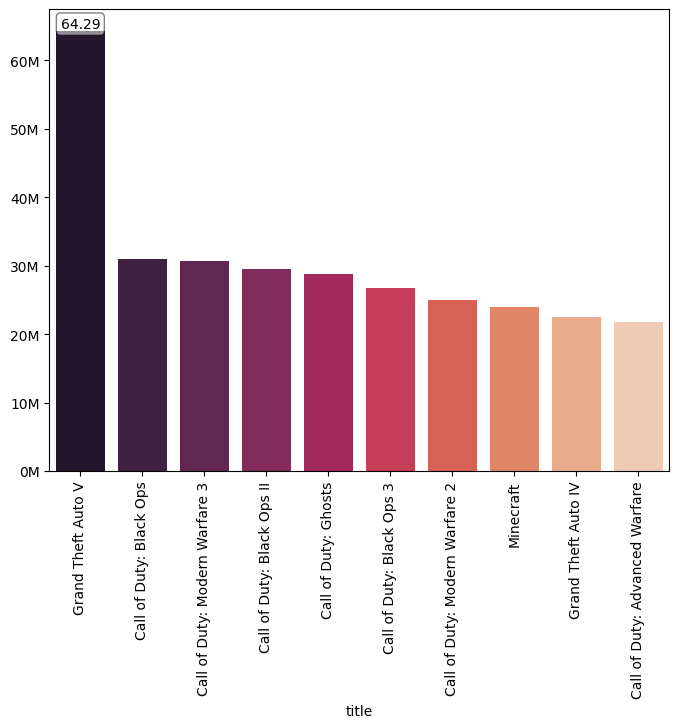

In [233]:
top_selling_games = df.groupby('title')['total_sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
ax = sns.barplot(x=top_selling_games.index, y=top_selling_games.values, palette='rocket')
ax.bar_label(ax.containers[0], label_type='edge', fontsize=10, color='black', 
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))

plt.xticks(rotation=90)
plt.show()


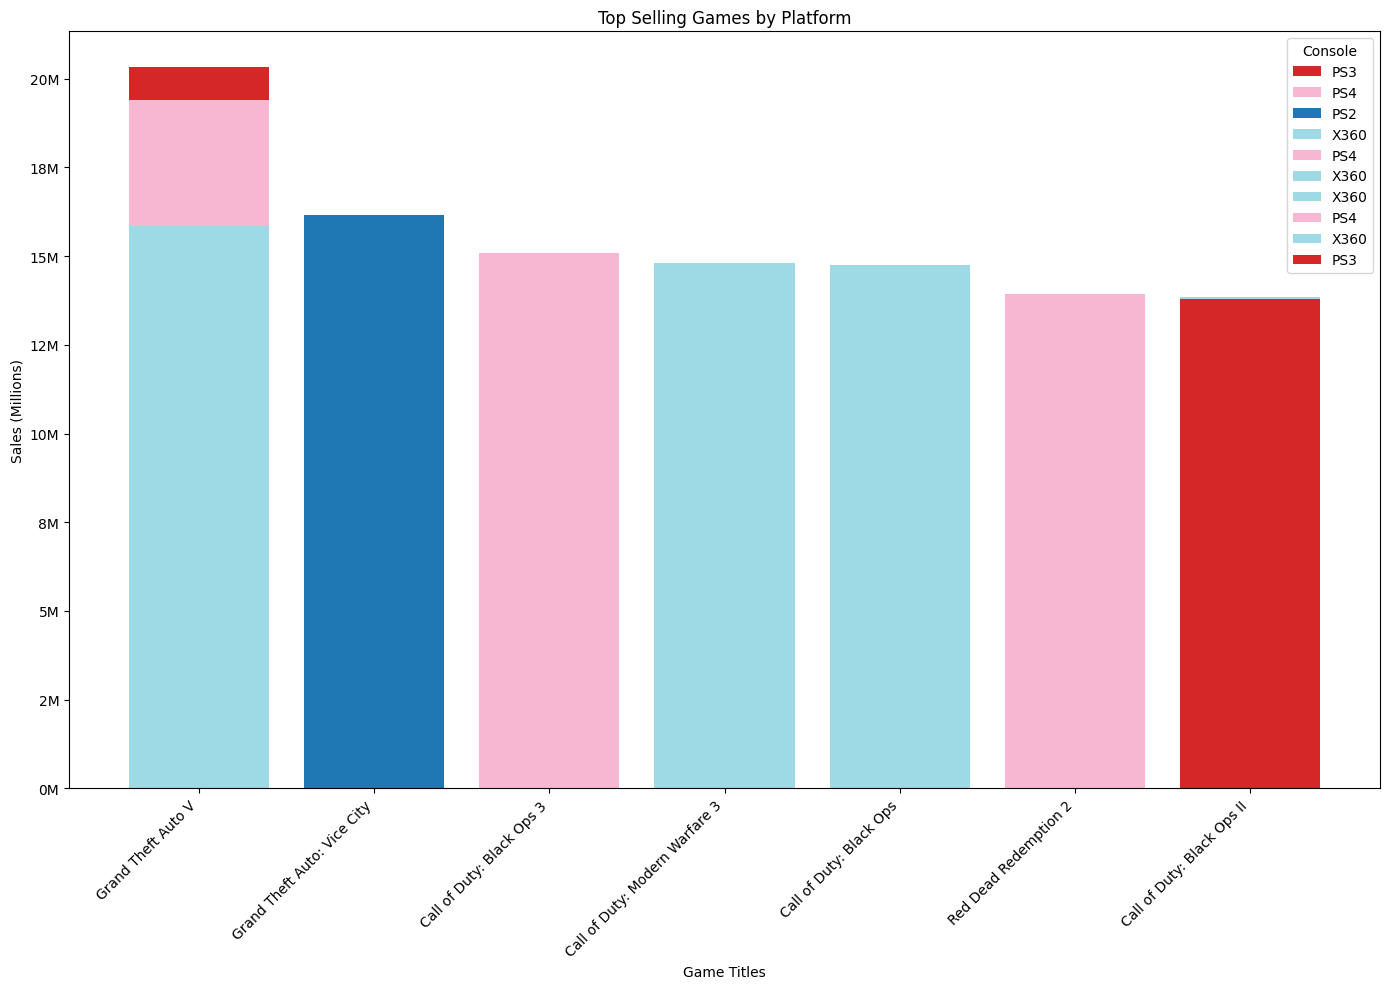

In [192]:
titles = [index[0] for index in platforms.index]
consoles = [index[1] for index in platforms.index]
sales = platforms.values
unique_consoles = np.unique(consoles)
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_consoles)))
console_colors = dict(zip(unique_consoles, colors))

sales_in_millions = sales

plt.figure(figsize=(14, 10))
for i in range(len(titles)):
    console = consoles[i]
    color = console_colors[console]
    plt.bar(titles[i], sales_in_millions[i], color=color, label=console)

plt.xlabel('Game Titles')
plt.ylabel('Sales (Millions)')
plt.title('Top Selling Games by Platform')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Console',loc='best')

# Add "Millions" to y-axis tick labels
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))

plt.tight_layout()
plt.show()

In [234]:
genre_stats=df.groupby('genre').agg({
    'critic_score':'median',
    'total_sales':'sum'
})
sorted_genres_by_score=genre_stats.sort_values(by='critic_score',ascending=False)
sorted_genres_by_sales=genre_stats.sort_values(by='total_sales',ascending=False)

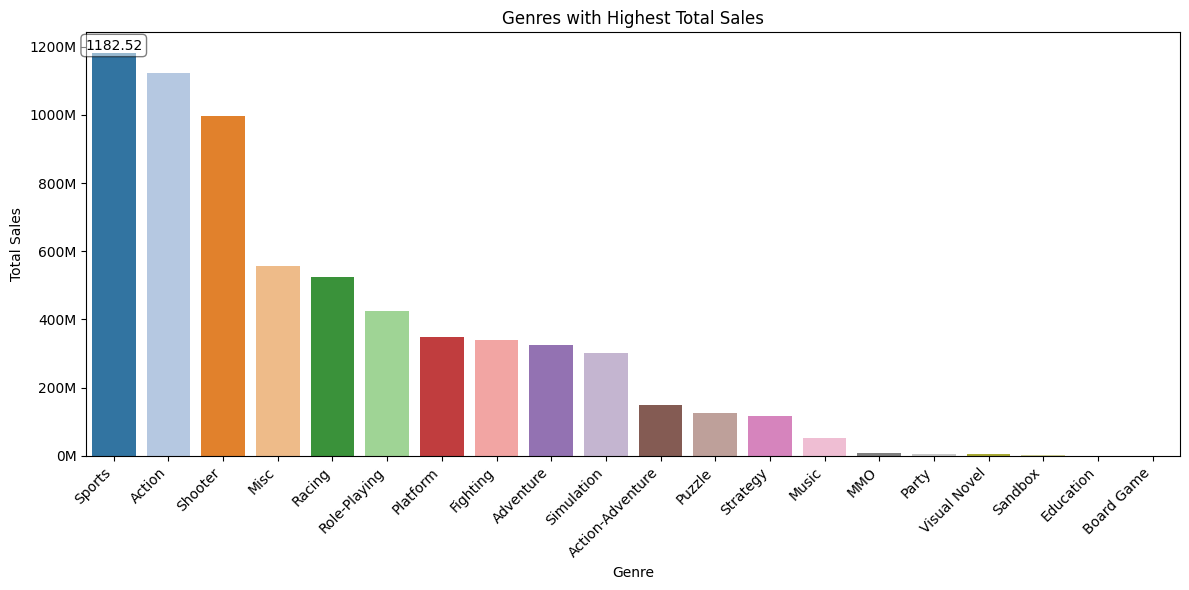

In [236]:
palette = sns.color_palette("tab20", len(sorted_genres_by_score))

plt.figure(figsize=(12, 6))
ax=sns.barplot(x=sorted_genres_by_sales.index, y=sorted_genres_by_sales['total_sales'], palette=palette)
ax.bar_label(ax.containers[0], label_type='edge', fontsize=10, color='black', 
              bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))
plt.title('Genres with Highest Total Sales')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

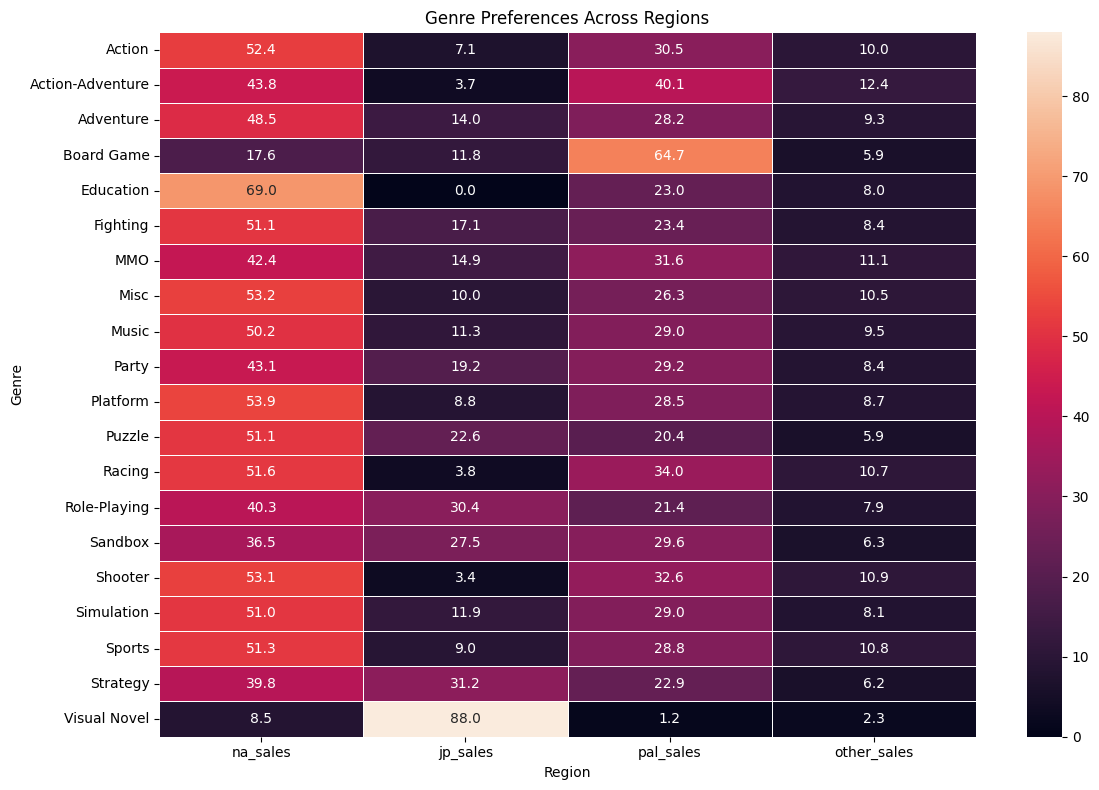

In [237]:
genre_sales = df.groupby('genre')[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum()

# Normalize sales data to get percentages
genre_sales_normalized = genre_sales.div(genre_sales.sum(axis=1), axis=0) * 100

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(genre_sales_normalized, cmap='rocket', annot=True, fmt='.1f', linewidths=.5)
plt.title('Genre Preferences Across Regions')
plt.xlabel('Region')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

In [206]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [247]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


label_encoders = {}
for column in ['console', 'publisher', 'developer', 'release_date']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

X = df[['console', 'publisher', 'developer', 'release_date']]
y = df['genre']

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.18234672304439747
Classification Report:
                  precision    recall  f1-score   support

          Action       0.13      0.30      0.18      1486
Action-Adventure       0.05      0.04      0.04       221
       Adventure       0.00      0.00      0.00      1092
      Board Game       0.00      0.00      0.00         3
       Education       0.00      0.00      0.00         4
        Fighting       0.00      0.00      0.00       425
             MMO       0.00      0.00      0.00        18
            Misc       0.23      0.70      0.35      1794
           Music       0.00      0.00      0.00        43
           Party       0.00      0.00      0.00        29
        Platform       0.18      0.04      0.06       664
          Puzzle       0.00      0.00      0.00       625
          Racing       0.00      0.00      0.00       617
    Role-Playing       0.10      0.01      0.01       979
         Sandbox       0.00      0.00      0.00         2
         Shooter  

In [255]:
drop_columns = ["title", "console", "publisher", "developer", "genre", "jp_sales","other_sales", "release_date"]
df.drop(drop_columns, axis=1, inplace=True)

df

,critic_score,total_sales,na_sales,pal_sales
0,7.5,0.00,0.00,0.0
1,7.5,0.00,0.00,0.0
2,7.5,0.00,0.00,0.0
3,7.5,0.00,0.00,0.0
4,7.5,0.41,0.15,0.1
...,...,...,...,...
56754,7.5,0.00,0.00,0.0
56755,7.5,0.00,0.00,0.0
56756,7.5,0.00,0.00,0.0
56757,7.5,0.00,0.00,0.0


In [264]:
df_vgSales = df.sample(frac=1, random_state=42)

# We need to remove any NaN/Unknown values:
df_vgSales.dropna(inplace=True)

# Along with removing rows containing 0 sales:
df_vgSales = df_vgSales[(df_vgSales != 0).all(axis=1)]

# We also need to reset the index:
df_vgSales = df_vgSales.reset_index(drop = True)

df_vgSales


In [278]:
Xx = df_vgSales.iloc[:, :-1].values
yy = df_vgSales.iloc[:, -1].values

from sklearn.model_selection import train_test_split

Xx_train, Xx_test, yy_train, yy_test = train_test_split(Xx, yy, test_size=0.2)
Xx


array([[7.9 , 0.22, 0.05],
       [7.5 , 0.1 , 0.07],
       [7.5 , 0.48, 0.25],
       ...,
       [6.6 , 0.64, 0.26],
       [5.2 , 0.21, 0.12],
       [9.1 , 0.46, 0.04]])

In [281]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(Xx_train, yy_train)
RandomForestRegressor(random_state=42)
y_pred_reg = reg.predict(Xx_test)
print("Mean Absolute Error:", mean_absolute_error(yy_test, 
y_pred_reg))
print("Mean Squared Error:", mean_squared_error(yy_test, 
y_pred_reg))
print("R^2 Score:", r2_score(yy_test, y_pred_reg))

Mean Absolute Error: 0.036113955266030374
Mean Squared Error: 0.008078515428246771
R^2 Score: 0.9574856275686101
